In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Dataset Paths
TRAIN_DIR = "C:\\Users\\Administrator\\OneDrive - Amrita vishwa vidyapeetham\\SEM6_CSE\\NNDL_DRUG\\train"  # Update with correct path
TEST_DIR = "C:\\Users\\Administrator\\OneDrive - Amrita vishwa vidyapeetham\\SEM6_CSE\\NNDL_DRUG\\test"  # Update with correct path
IMG_SIZE = 64  # Resize images to 64x64

def load_data(dataset_dir, img_size):
    images, labels = [], []
    for img_name in os.listdir(dataset_dir):
        img_path = os.path.join(dataset_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))  # Resize images
            img = img / 255.0  # Normalize pixel values
            
            # Assign labels based on filenames
            label = 1 if "dog" in img_name else 0
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load images & labels
images, labels = load_data(TRAIN_DIR, IMG_SIZE)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Reshape labels for CNN (one-hot encoding)
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

# Print dataset size
print(f"Training samples: {X_train.shape[0]}, Validation samples: {X_val.shape[0]}")


Training samples: 20000, Validation samples: 5000


In [2]:
# Define CNN Model
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Reduce overfitting
    Dense(2, activation='softmax')  # 2 output classes: Dog(1) or Cat(0)
])

# Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,644,738 (6.27 MB)

 Trainable params: 1,644,738 (6.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 119ms/step - accuracy: 0.5976 - loss: 0.6621 - val_accuracy: 0.7290 - val_loss: 0.5365
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 122ms/step - accuracy: 0.7433 - loss: 0.5203 - val_accuracy: 0.7572 - val_loss: 0.5082
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 124ms/step - accuracy: 0.7904 - loss: 0.4517 - val_accuracy: 0.7826 - val_loss: 0.4516
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 149ms/step - accuracy: 0.8127 - loss: 0.4099 - val_accuracy: 0.7814 - val_loss: 0.4497
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.8507 - loss: 0.3423 - val_accuracy: 0.7988 - val_loss: 0.4347
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.8764 - loss: 0.2920 - val_accuracy: 0.8030 - val_loss: 0.4502
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 116ms/step - accuracy: 0.8943 - loss: 0.2548 - val_accuracy: 0.8110 - val_loss: 0.4486
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 148ms/step - accuracy: 0.9143 - loss: 0

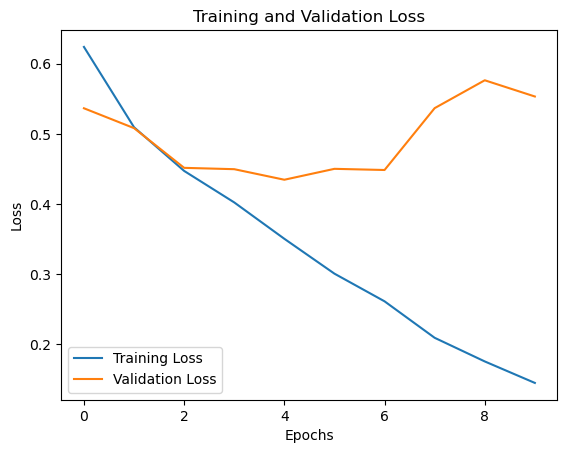

In [3]:
# Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step


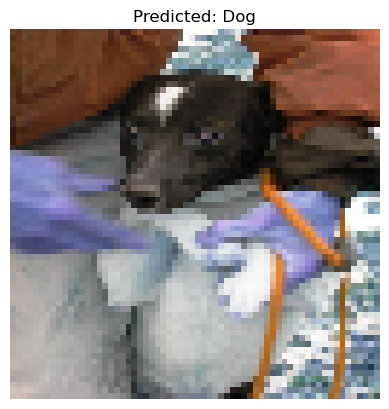

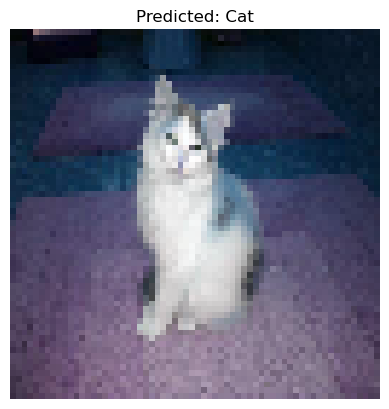

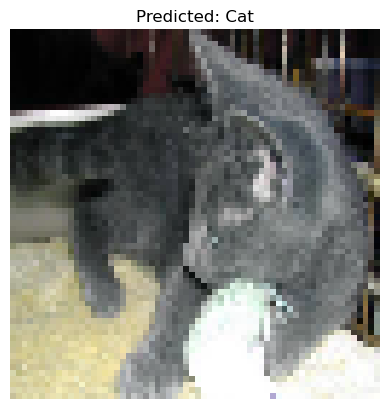

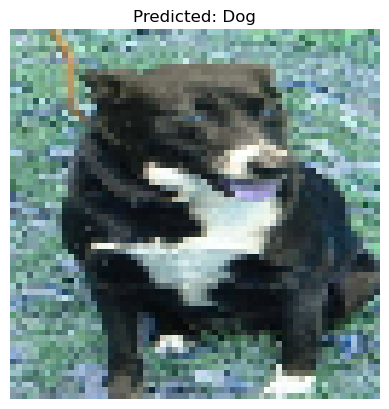

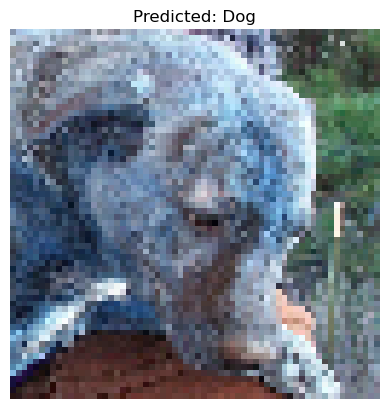

In [4]:
def load_test_data(test_dir, img_size):
    test_images, test_names = [], []
    for img_name in os.listdir(test_dir):
        img_path = os.path.join(test_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            img = img / 255.0
            test_images.append(img)
            test_names.append(img_name)

    return np.array(test_images), test_names

# Load test images
X_test, test_names = load_test_data(TEST_DIR, IMG_SIZE)

# Predict on test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Show first 5 predictions
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {'Dog' if predicted_classes[i] == 1 else 'Cat'}")
    plt.axis('off')
    plt.show()
